In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Dataset shape: (300, 3)


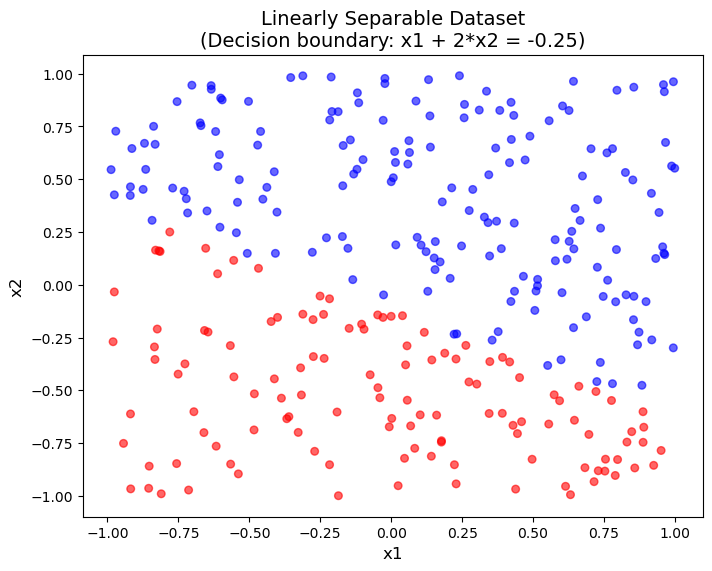

In [38]:
# Generate a linearly separable dataset
# Decision boundary: x1 + 2*x2 = -0.25
# Points where x1 + 2*x2 > -0.25 are labeled as +1, otherwise -1
rng = np.random.default_rng(0)
n = 300
X = rng.uniform(-1, 1, size=(n, 2))
y = np.where(X[:, 0] + (2*X[:, 1]) > -0.25, 1, -1)

df = pd.DataFrame({"x1": X[:, 0], "x2": X[:, 1], "y": y})
print(f"Dataset shape: {df.shape}")

# Visualize the linearly separable dataset
plt.figure(figsize=(8, 6))
colors = ['red' if label == -1 else 'blue' for label in df['y']]
plt.scatter(df['x1'], df['x2'], c=colors, alpha=0.6, s=30)
plt.xlabel('x1', fontsize=12)
plt.ylabel('x2', fontsize=12)
plt.title('Linearly Separable Dataset\n(Decision boundary: x1 + 2*x2 = -0.25)', fontsize=14)
plt.show()

Training perceptron...
Total iterations: 49
Number of mistakes in final iteration: 0
Final weights: w1 = 8.1579, w2 = 16.0657, bias = 2.0000
Final weight w1 should approx equal 2(w2) since true boundary is x1 + 2*x2 = -0.25


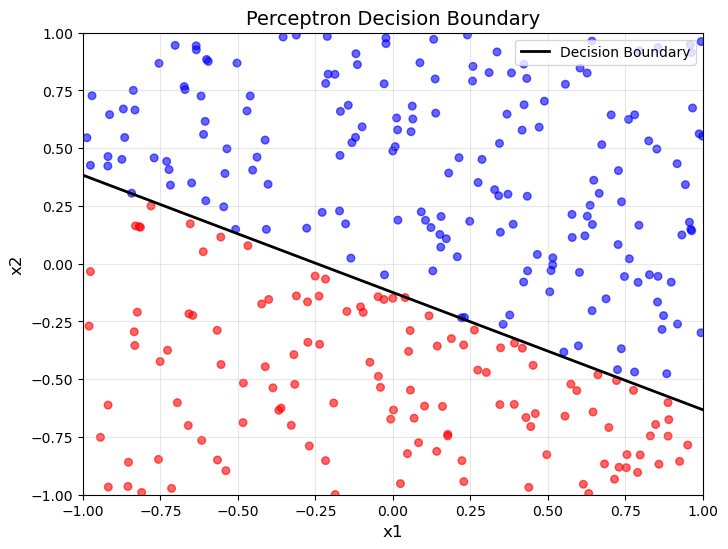


Accuracy on training data: 1.0000 (300/300)


In [39]:
# Train Perceptron Algorithm
# Initialize weights and bias to zero
w1 = 0
w2 = 0
bias = 0
max_iterations = 1000  # Maximum iterations (should be infinite in theory, but let's cap it)

print("Training perceptron...")
for i in range(max_iterations):
    mistakes = 0
    for j in range(len(df)):
        x1 = df.iloc[j]['x1']
        x2 = df.iloc[j]['x2']
        y = df.iloc[j]['y']
        # Update rule: if prediction is wrong (y * (w·x + b) <= 0), update weights
        if y * ((w1 * x1) + (w2 * x2) + bias) <= 0:
            w1 += y * x1
            w2 += y * x2
            bias += y
            mistakes += 1
    # Stop if no mistakes made in a full pass through the data
    if mistakes == 0:
        break
    
print(f"Total iterations: {i + 1}")
#if max_iterations was reached, mistakes >= 0
#if we ran infinte, mistakes would eventually be 0 assuming the data is linearly separable
print(f"Number of mistakes in final iteration: {mistakes}")
print(f"Final weights: w1 = {w1:.4f}, w2 = {w2:.4f}, bias = {bias:.4f}")
print("Final weight w1 should approx equal 2(w2) since true boundary is x1 + 2*x2 = -0.25")

# Visualize the decision boundary
plt.figure(figsize=(8, 6))
colors = ['red' if label == -1 else 'blue' for label in df['y']]
plt.scatter(df['x1'], df['x2'], c=colors, alpha=0.6, s=30)

# Plot decision boundary: w1*x1 + w2*x2 + bias = 0
# Solving for x2: x2 = -(w1*x1 + bias) / w2
x1_boundary = np.linspace(-1, 1, 100)
x2_boundary = -(w1 * x1_boundary + bias) / w2
plt.plot(x1_boundary, x2_boundary, 'k-', linewidth=2, label='Decision Boundary')

plt.xlabel('x1', fontsize=12)
plt.ylabel('x2', fontsize=12)
plt.title('Perceptron Decision Boundary', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend(loc='upper right')
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.show()

# Calculate accuracy
correct = 0
for j in range(len(df)):
    x1 = df.iloc[j]['x1']
    x2 = df.iloc[j]['x2']
    y = df.iloc[j]['y']
    prediction = 1 if (w1 * x1 + w2 * x2 + bias) > 0 else -1
    if prediction == y:
        correct += 1
accuracy = correct / len(df)
print(f"\nAccuracy on training data: {accuracy:.4f} ({correct}/{len(df)})")

XOR Problem - Original Data:
Input X:
[[-1. -1.]
 [-1.  1.]
 [ 1. -1.]
 [ 1.  1.]]

Labels y (XOR):
[-1  1  1 -1]

Visualization in original 2D space:


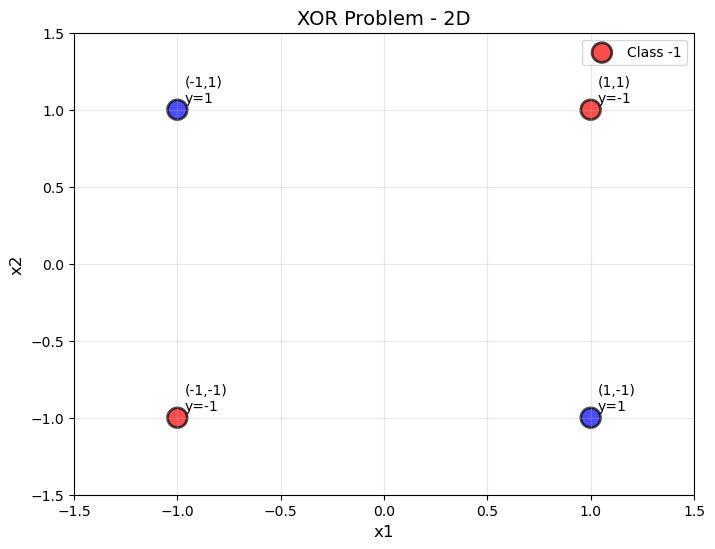

Solution: Add 3rd dimension to XOR
Transformed feature space Z = [x1, x2, x1*x2]:
[[-1. -1.  1.]
 [-1.  1. -1.]
 [ 1. -1. -1.]
 [ 1.  1.  1.]]
Explanation: x1*x2 will be +1 when they are both positive or both negative, and -1 when they are different.
XOR is now linearly seperable using this dimension


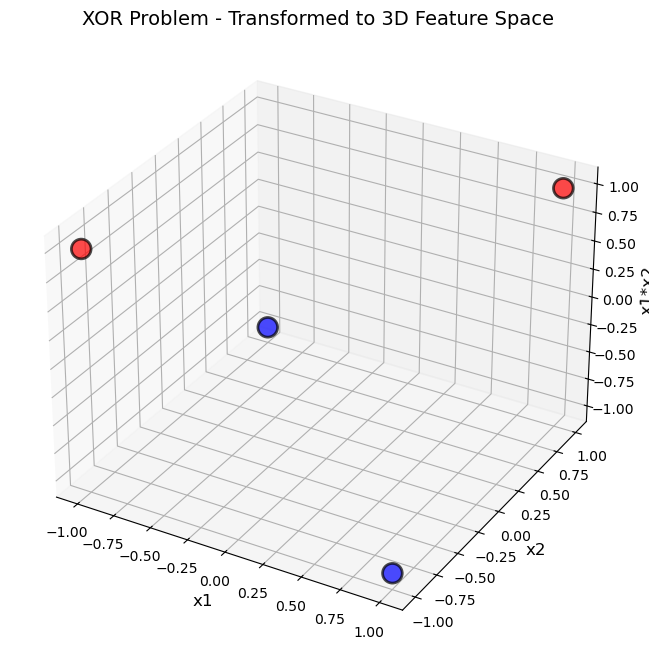

Training Perceptron
Total iterations: 2
Final weights: w = [ 0.  0. -4.]
w1 and w2 should be close to 0 since they do not assist in seperating the data
w3 should have a high abs value since it is the only one that seperates the data
Final bias: b = 0.0000
Accuracy: 1.0000


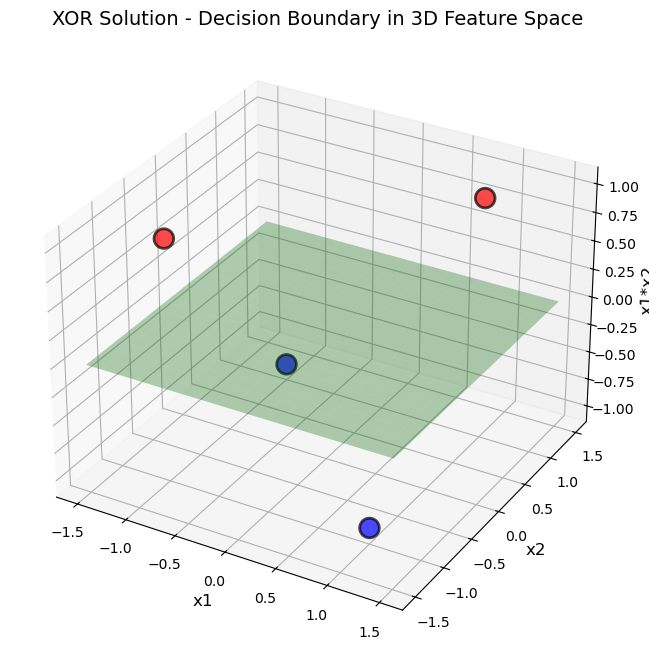

EXTRA CREDIT: What was modified to solve XOR?

KEY MODIFICATIONS TO SOLVE XOR:
Added a 3rd dimension to the data, and added the interaction term x1*x2 as a new feature.
This created a 3D space where the data became linearly separable.
The decision boundary in transformed space: w[0]*x1 + w[1]*x2 + w[2]*(x1*x2) + b = 0.
This is a "kernal trick".



In [40]:
# Extra credit XOR Problem
# XOR is not linearly separable in the original 2D space
# We need to transform the feature space to make it linearly separable

X = np.array([[-1,-1], [-1,1], [1,-1], [1,1]], dtype=float)
y = np.array([-1, 1, 1, -1], dtype=int)  # XOR labels

print("XOR Problem - Original Data:")
print("Input X:")
print(X)
print("\nLabels y (XOR):")
print(y)
print("\nVisualization in original 2D space:")

# Visualize XOR in original space
plt.figure(figsize=(8, 6))
colors = ['red' if label == -1 else 'blue' for label in y]
plt.scatter(X[:, 0], X[:, 1], c=colors, s=200, alpha=0.7, edgecolors='black', linewidth=2)
for i, (x1, x2) in enumerate(X):
    plt.annotate(f'({int(x1)},{int(x2)})\ny={y[i]}', (x1, x2), 
                xytext=(5, 5), textcoords='offset points', fontsize=10)
plt.xlabel('x1', fontsize=12)
plt.ylabel('x2', fontsize=12)
plt.title('XOR Problem - 2D', fontsize=14)
plt.grid(True, alpha=0.3)
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.legend(['Class -1', 'Class +1'], loc='upper right')
plt.show()

Z = np.column_stack([X, X[:,0]*X[:,1]])
print("Solution: Add 3rd dimension to XOR")
print("Transformed feature space Z = [x1, x2, x1*x2]:")
print(Z)
print("Explanation: x1*x2 will be +1 when they are both positive or both negative, and -1 when they are different.")
print("XOR is now linearly seperable using this dimension")

# Visualize in transformed 3D space
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
colors_3d = ['red' if label == -1 else 'blue' for label in y]
ax.scatter(Z[:, 0], Z[:, 1], Z[:, 2], c=colors_3d, s=200, alpha=0.7, edgecolors='black', linewidth=2)
ax.set_xlabel('x1', fontsize=12)
ax.set_ylabel('x2', fontsize=12)
ax.set_zlabel('x1*x2', fontsize=12)
ax.set_title('XOR Problem - Transformed to 3D Feature Space', fontsize=14)
plt.show()

# Train Perceptron in transformed feature space
print("Training Perceptron")
w = np.zeros(Z.shape[1])
b = 0.0
iterations = 0
for epoch in range(100):
    mistakes = 0
    for i in range(len(Z)):
        if y[i] * (Z[i] @ w + b) <= 0:
            w += y[i] * Z[i]
            b += y[i]
            mistakes += 1
    iterations = epoch + 1
    if mistakes == 0:
        break

pred = np.where(Z @ w + b > 0, 1, -1)
accuracy = (pred == y).mean()

print(f"Total iterations: {iterations}")
print(f"Final weights: w = {w}")
print("w1 and w2 should be close to 0 since they do not assist in seperating the data")
print("w3 should have a high abs value since it is the only one that seperates the data")
print(f"Final bias: b = {b:.4f}")
print(f"Accuracy: {accuracy:.4f}")

# Visualize decision boundary in transformed space
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot data points
ax.scatter(Z[:, 0], Z[:, 1], Z[:, 2], c=colors_3d, s=200, alpha=0.7, edgecolors='black', linewidth=2)

# Plot decision boundary plane: w[0]*x1 + w[1]*x2 + w[2]*x1*x2 + b = 0
# Create a mesh for the plane
x1_range = np.linspace(-1.5, 1.5, 20)
x2_range = np.linspace(-1.5, 1.5, 20)
X1_mesh, X2_mesh = np.meshgrid(x1_range, x2_range)
# Solve for x1*x2: x1*x2 = -(w[0]*x1 + w[1]*x2 + b) / w[2]
X3_mesh = -(w[0] * X1_mesh + w[1] * X2_mesh + b) / w[2]
ax.plot_surface(X1_mesh, X2_mesh, X3_mesh, alpha=0.3, color='green')

ax.set_xlabel('x1', fontsize=12)
ax.set_ylabel('x2', fontsize=12)
ax.set_zlabel('x1*x2', fontsize=12)
ax.set_title('XOR Solution - Decision Boundary in 3D Feature Space', fontsize=14)
plt.show()

print("EXTRA CREDIT: What was modified to solve XOR?")
print("""
KEY MODIFICATIONS TO SOLVE XOR:
Added a 3rd dimension to the data, and added the interaction term x1*x2 as a new feature.
This created a 3D space where the data became linearly separable.
The decision boundary in transformed space: w[0]*x1 + w[1]*x2 + w[2]*(x1*x2) + b = 0.
This is a "kernal trick".
""")